In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import scipy.integrate as scint
plt.style.use('dark_background')

# Deriving an estimate for $π$

In [2]:
def est_pi(n):
  n_point_circle = 0
  n_point_tot = 0

  for _ in range(n):
    x = random.uniform(0,1)
    y = random.uniform(0,1)
    dist = np.sqrt(x**2 + y**2)
    if dist <= 1:
      n_point_circle += 1
    n_point_tot += 1

  return 4*(n_point_circle/n_point_tot)

The accepted value for $π$ is 3.14159,

In [3]:
e_pi = est_pi(1000000)
e_pi

3.140268



---



---



# Volume of a Sphere, Visualisation

Here we visualise the components of a method for deriving the volume of a sphere using calculus.

In [4]:
r_min = 0
r_max = 1
num = 1000

In [5]:
def give_sphere(x, y, z, r, num):
    points = []
    for i in range(0, num):

        u = np.random.uniform(0,1,size=num)
        ir = np.cbrt((u*r_max**3)+((1-u)*r_min**3))
        iphi = np.random.uniform(0,2*np.pi,num)
        itheta = np.arccos(np.random.uniform(-1,1,num))

        ix = x + ir * np.sin(itheta) * np.cos(iphi)
        iy = y + ir * np.sin(itheta) * np.sin(iphi)
        iz = z + ir * np.cos(itheta)

        points.append((ix, iy, iz))

    return points

### Sphere of volume V

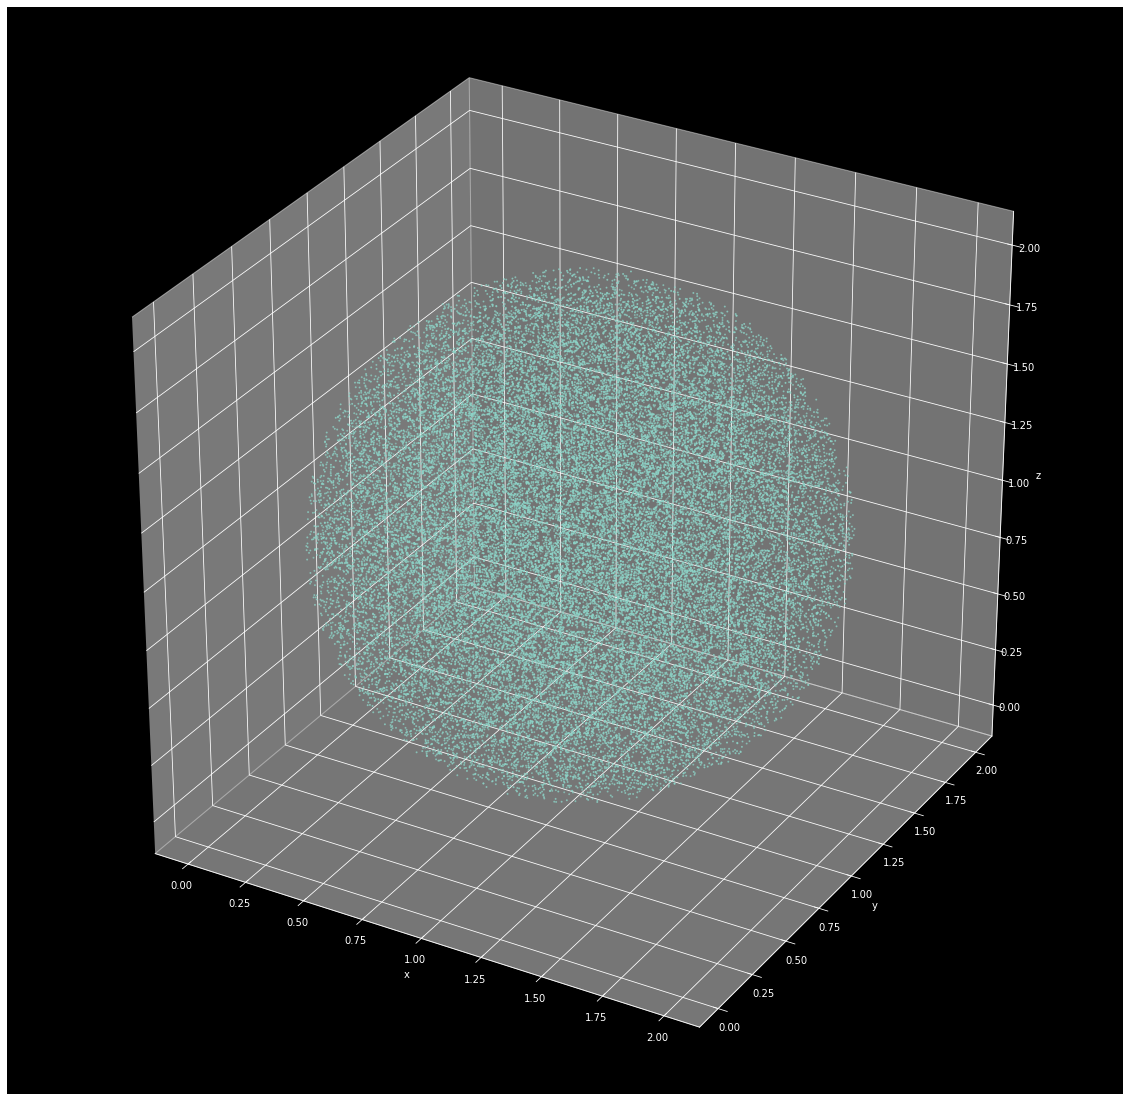

In [6]:
def plot_sphere(points, ax):
    x_list = [x for [x, y, z] in points]
    y_list = [y for [x, y, z] in points]
    z_list = [z for [x, y, z] in points]

    ax.scatter(x_list, y_list, z_list, s=1)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')

points1 = give_sphere(1, 1, 1, 1, 200)
plot_sphere(points1, ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [7]:
x_list = [x for [x, y, z] in points1]
y_list = [y for [x, y, z] in points1]
z_list = [z for [x, y, z] in points1]

In [8]:
fx = np.concatenate(x_list).flat
fy = np.concatenate(y_list).flat
fz = np.concatenate(z_list).flat

In [9]:
dfx = pd.DataFrame(fx, columns=['x'])
dfy = pd.DataFrame(fy, columns=['y'])
dfz = pd.DataFrame(fz, columns=['z'])

In [10]:
dfc = dfx.assign(y=dfy)
df = dfc.assign(z=dfz)

In [11]:
rando = range(0,40000,1)
get = np.random.choice(rando)

x_disc_coord = df.iloc[get,0]
y_disc_coord = df.iloc[get,1]
z_disc_coord = df.iloc[get,2]

print(z_disc_coord)
print(x_disc_coord)

0.8391571702049614
0.8164594868548941


In [12]:
r_min_d = 0
r_max_d = x_disc_coord

In [13]:
def disc(x, y, r, num):
    points_disc = []
    for i in range(0, num):

        u = np.random.uniform(0,r_max_d,size=num)
        ir = np.cbrt((u*r_max_d**3)+((1-u)*r_min_d**3))
        iphi = np.random.uniform(0,2*np.pi,num)
        itheta = np.arccos(np.random.uniform(-1,1,num))

        ix = x + ir * np.cos(iphi)
        iy = y + ir * np.sin(iphi)

        points_disc.append((ix, iy))

    return points_disc

### Wafer disc of area A

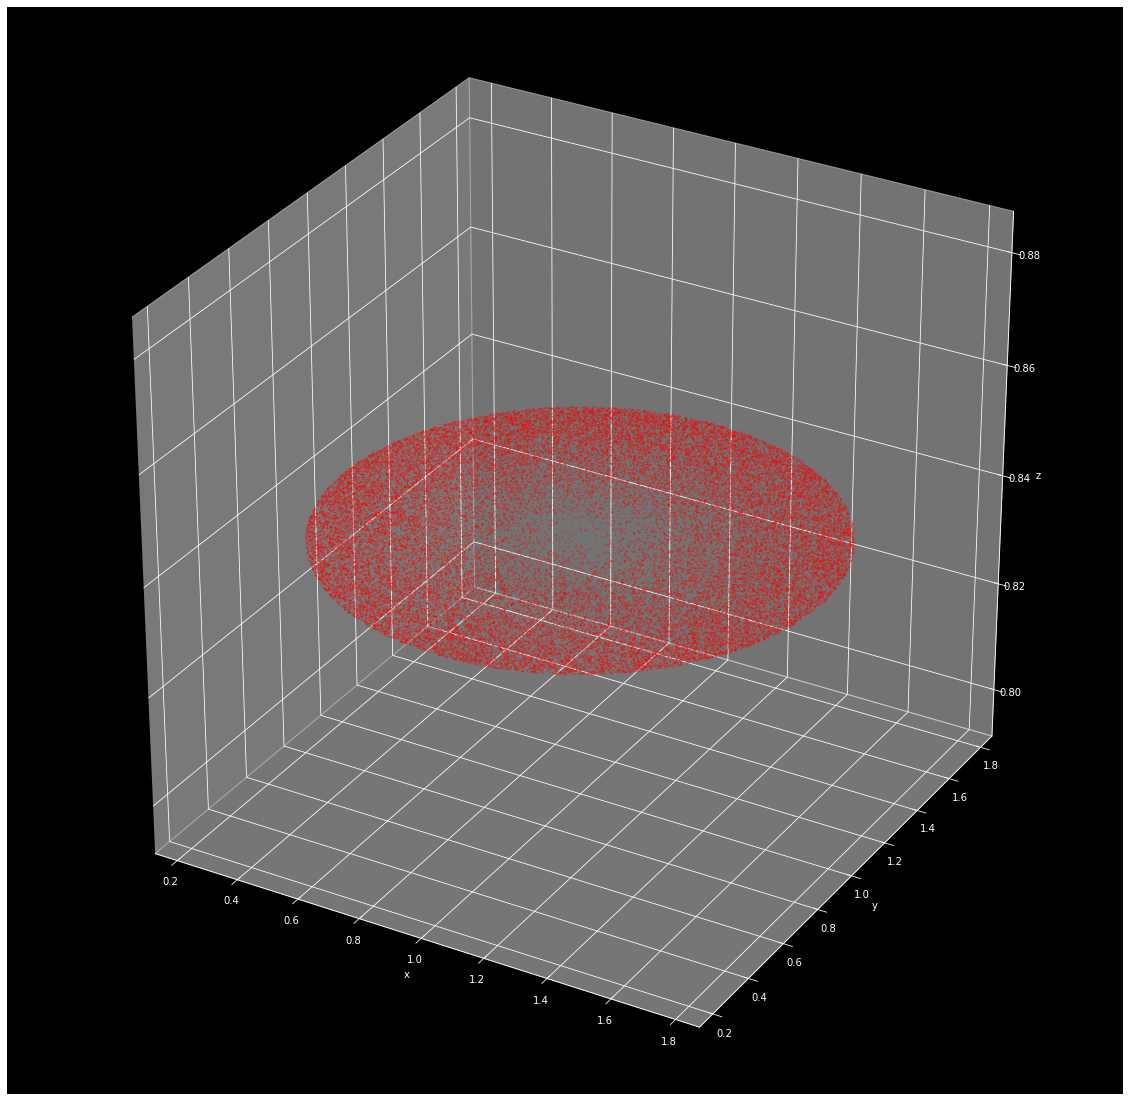

In [14]:
def disc_plot(points, ax):
    x_list = [x for [x, y] in points]
    y_list = [y for [x, y] in points]

    ax.scatter(x_list, y_list, z_disc_coord, s=0.5, alpha=0.33, color='red')

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')

points2 = disc(1, 1, 1, 200)
disc_plot(points2, ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

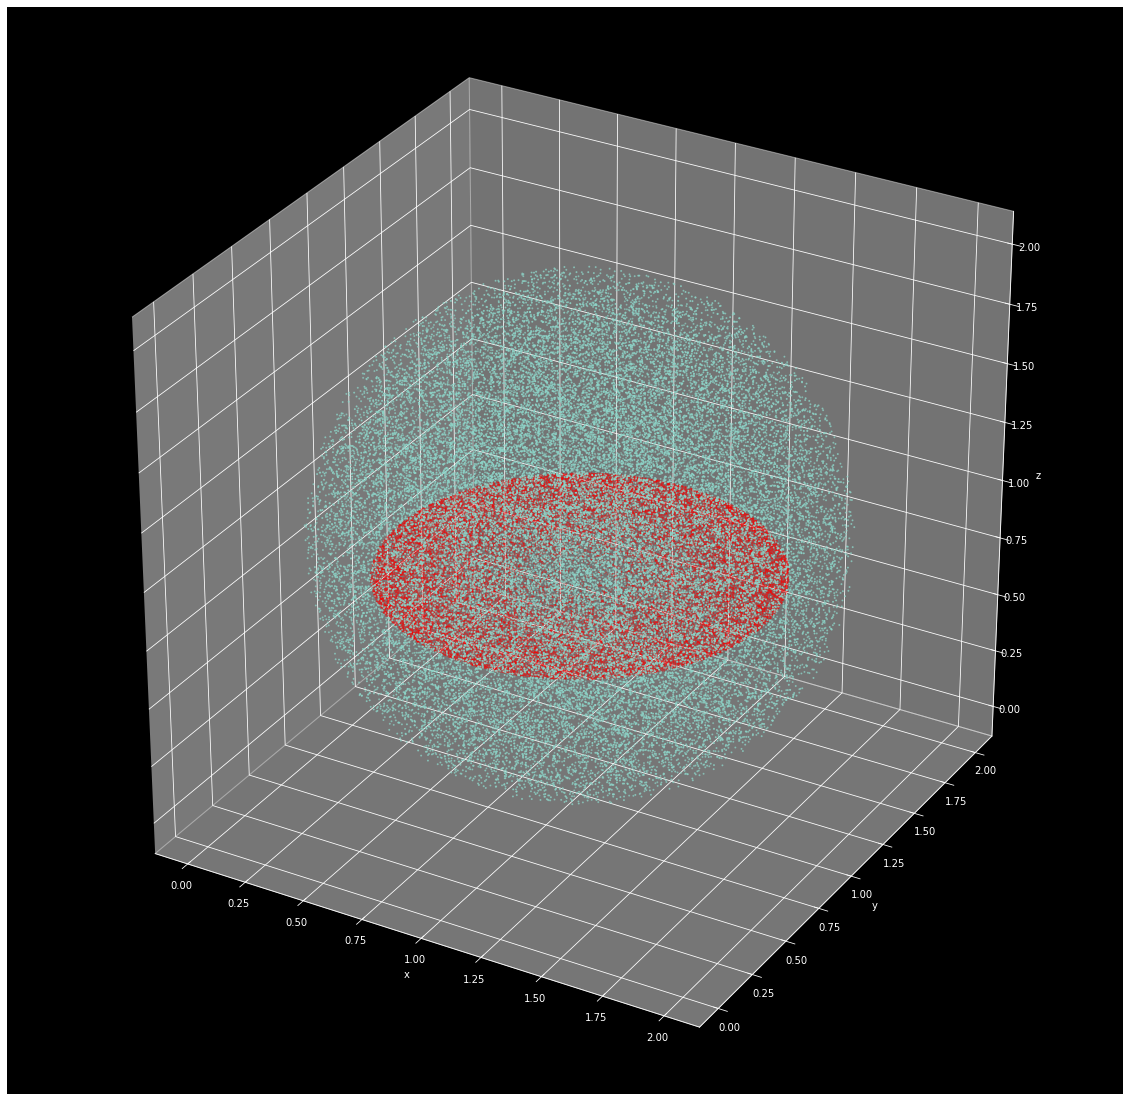

In [15]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')

points1 = give_sphere(1, 1, 1, 1, 200)
points2 = disc(1, 1, z_disc_coord, 200)

plot_sphere(points1, ax)
disc_plot(points2, ax)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()



---



---



# Corrected Visualisation

Here we have the correct visualisation of a sphere and its waffer thin disc.

In [16]:
dim_len = 100
spacing = 2 / dim_len
point_cloud = np.mgrid[-1:1:spacing, -1:1:spacing, -1:1:spacing].reshape(3, -1).T

print(point_cloud.size)

3000000


In [17]:
df = pd.DataFrame(point_cloud, columns=['x', 'y', 'z'])

In [18]:
rando = range(0,1000000,1)
get = np.random.choice(rando)
get

7499

In [19]:
x_disc_coord = df.iloc[get,0]/2
y_disc_coord = df.iloc[get,1]/2
z_disc_coord = df.iloc[get,2]/2

print(x_disc_coord)
print(y_disc_coord)
print(z_disc_coord)

-0.5
0.24
0.49


In [20]:
disc_points = df.to_numpy()

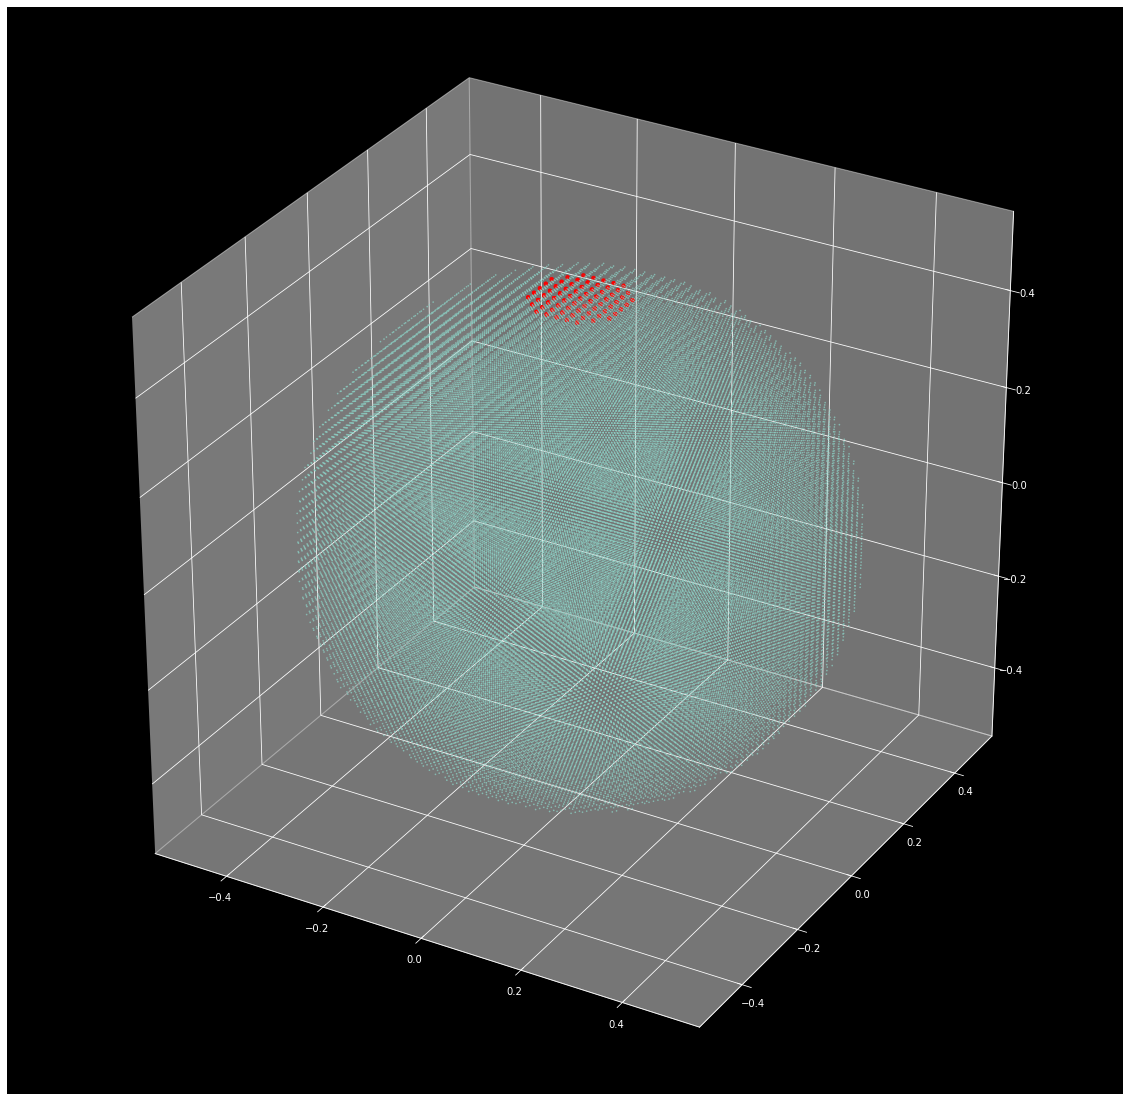

In [21]:
point_radius = np.linalg.norm(point_cloud, axis=1)
sphere_radius = 0.5
in_points = point_radius < sphere_radius

disc_point_radius = np.linalg.norm(disc_points, axis=1)
disc_radius = np.sqrt((sphere_radius**2) - (z_disc_coord**2))
disc_in_points = disc_point_radius < disc_radius



fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter(point_cloud[in_points, 0], point_cloud[in_points, 1], point_cloud[in_points, 2], s=0.5)
ax.scatter(disc_points[disc_in_points, 0], disc_points[disc_in_points, 1], z_disc_coord, s=10, color='red')

# x, y, z = np.array([[-0.6,0,0],[0,-0.6,0],[0,0,-0.6]])
# u, v, w = np.array([[1.2,0,0],[0,1.2,0],[0,0,1.2]])
# ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.1, color="black")

plt.show()

# Volume of a Sphere, Calculus Derivation

From the Pythagorean theorem,

$a^2 + z^2 = r^2$

which can be rearranged to give the radius of the disc segment,

$a = \sqrt{(r^2 - z^2)}$

Then we assume an infinitely thin disc, approximating to a circle, the area is given by,

$A_{disc} = π\left(\sqrt{(r^2 - z^2)}\right)^2 = π(r^2 - z^2) = \pi(a^2)$

Our disc of thickness $dz$ is now integrated over the whole sphere denoted $-r$ and $r$,

$Vol_{sphere} = \int_{-r}^{r} π(r^2 - z^2) dz $

Applying the limits,

$ = π \left(zr^2 - \frac{-z}{3} \right) |^{r}_{-r} $

$ = π \left(\frac{2}{3}r^3 - \frac{-2}{3} r^3 \right) $

$ = π \left(\frac{4}{3}r^3 \right) $ 

Finally we are left with the standard formula for the volume of a sphere,

$ Vol_{disc} = \frac{4}{3} π r^3 $

# Volume of a Sphere, Result 1

Here we use the integral derived above.

In [22]:
r = sphere_radius
z = z_disc_coord

In [23]:
integrand = lambda z : np.pi*(r**2 - z**2)

result, error = scint.quad(integrand, -r, r)
print('Volume of the sphere given radius', round(r,3), 'and veritcle distance to disc segement', round(z,3), 'is', round(result,6))
print('The error of the function is', round(error, 16))

Volume of the sphere given radius 0.5 and veritcle distance to disc segement 0.49 is 0.523599
The error of the function is 5.8e-15


In [24]:
def accepted_vol(r):
  vol_sphere = (4/3)*np.pi*r**3
  return vol_sphere

vol_f = accepted_vol(r)
print('The accepted value for the volume of a sphere given radius', round(r,3), 'and veritcle distance to disc segement', round(z,3), 'is', round(vol_f, 6))

The accepted value for the volume of a sphere given radius 0.5 and veritcle distance to disc segement 0.49 is 0.523599




---



---



# Volume of a Sphere, Result 2

Here the $π$ estimate calculated in the beginning is used.

In [25]:
integrand = lambda z : e_pi*(r**2 - z**2)

result, error = scint.quad(integrand, -r, r)
print('Volume of the sphere given radius', round(r,3), 'and veritcle distance to disc segement', round(z,3), 'is', round(result,6))
print('The error of the function is', round(error, 16))

Volume of the sphere given radius 0.5 and veritcle distance to disc segement 0.49 is 0.523378
The error of the function is 5.8e-15


In [26]:
def accepted_vol(r):
  vol_sphere = (4/3)*e_pi*r**3
  return vol_sphere

vol_f = accepted_vol(r)
print('The accepted value for the volume of a sphere given radius', round(r,3), 'and veritcle distance to disc segement', round(z,3), 'is', round(vol_f, 6))

The accepted value for the volume of a sphere given radius 0.5 and veritcle distance to disc segement 0.49 is 0.523378




---



---



# Volume of a Sphere, Result 3

Repeating again using repeatable numbers to confirm calculations.

In [27]:
r = 1
z = 1

In [28]:
integrand = lambda z : np.pi*(r**2 - z**2)

result, error = scint.quad(integrand, -r, r)
print('Volume of the sphere given radius', r, 'and veritcle distance to disc segement', z, 'is', round(result,6))
print('The error of the function is', round(error, 16))

Volume of the sphere given radius 1 and veritcle distance to disc segement 1 is 4.18879
The error of the function is 4.65e-14


In [29]:
def accepted_vol(r):
  vol_sphere = (4/3)*np.pi*r**3
  return vol_sphere

vol_f = accepted_vol(1)
print('The accepted value for the volume of a sphere given radius', r, 'and veritcle distance to disc segement', z, 'is', round(vol_f, 6))

The accepted value for the volume of a sphere given radius 1 and veritcle distance to disc segement 1 is 4.18879




---



---

